In [1]:
import os
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

In [2]:
path = './'
folders = list(filter(lambda x: os.path.isdir(x) and not x.startswith('.'), os.listdir(path))) #devuelve una lista de los elementos en PATH


In [3]:
folders

['car', 'house']

In [4]:
path = './house'
image_list = os.listdir(path) #devuelve una lista de los elementos en la carpeta sample_data
image_list = list(filter(lambda x: x.endswith('.jpg'), image_list)) #filtrado ?

In [5]:
x_train = []
y_train = []

x_shape = 256
y_shape = 256
channels = 3

In [6]:
for i_label, folder in enumerate(folders):
    print(folder)
    image_list = os.listdir(folder) #devuelve una lista de los elementos en la carpeta sample_data
    image_list = list(filter(lambda x: x.endswith('.jpg'), image_list)) #filtrado ?
    for img in image_list:
        image_path = os.path.join(folder, img)
        print(image_path)
        im = Image.open(image_path)
        im = im.resize((x_shape, y_shape), Image.ANTIALIAS)
        x_train.append(np.asarray(im))
        y_train.append(i_label)

car
car/mazda-vision-coupe-wins-2018-concept-car-of-the-year-4.jpg
house
house/key-hole-house-1.jpg


In [7]:
y_train

[0, 1]

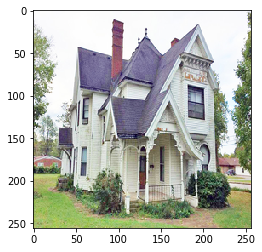

In [8]:
plt.imshow(x_train[1])

In [9]:
from keras.utils.np_utils import to_categorical

y_Hot = to_categorical(y_train, num_classes = len(folders))

Using TensorFlow backend.


In [10]:
y_Hot

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [11]:
from sklearn.utils import shuffle

X_shuffled, y_shuffled = shuffle(x_train, y_Hot)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

NETWORK

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [14]:
batch_size = 128
num_classes = len(folders)
epochs = 12

# input image dimensions
img_rows, img_cols = x_shape, y_shape

X_train = X_train / 255
X_test = X_test / 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (1, 256, 256, 3)
1 train samples
1 test samples


In [20]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(x_shape, y_shape, channels)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 124, 124, 32)      18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 62, 62, 32)        0         
__________

In [22]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 1 samples, validate on 1 samples
Epoch 1/12
1/1 [==============================] - 2s 2s/step - loss: 0.6058 - acc: 1.0000 - val_loss: 0.7671 - val_acc: 0.0000e+00
Epoch 2/12
1/1 [==============================] - 1s 538ms/step - loss: 0.3641 - acc: 1.0000 - val_loss: 0.8674 - val_acc: 0.0000e+00
Epoch 3/12
1/1 [==============================] - 0s 488ms/step - loss: 0.2498 - acc: 1.0000 - val_loss: 1.1692 - val_acc: 0.0000e+00
Epoch 4/12
1/1 [==============================] - 1s 534ms/step - loss: 0.0280 - acc: 1.0000 - val_loss: 1.3585 - val_acc: 0.0000e+00
Epoch 5/12
1/1 [==============================] - 1s 559ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.3976 - val_acc: 0.0000e+00
Epoch 6/12
1/1 [==============================] - 1s 710ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.4855 - val_acc: 0.0000e+00
Epoch 7/12
1/1 [==============================] - 1s 774ms/step - loss: 3.5256e-04 - acc: 1.0000 - val_loss: 

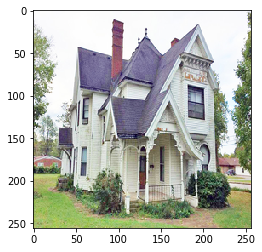

In [24]:
plt.imshow(X_test[0])